# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

### Install Prerequisites

To run the app in the notebook environment, you must first install the required packages by executing the cell below. **Make sure to restart the kernel after running each cell.**

> Note: Restarting the kernel ensures that all installed dependencies are properly loaded into the environment.

In [2]:
# Please restart the notebook kernel after running this cell.
!pip install -r requirements.txt | grep -v "already satisfied"

!python -m pip install --upgrade pip
!pip install --upgrade ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.14
    Uninstalling widgetsnbextension-4.0.14:
      Successfully uninstalled widgetsnbextension-4.0.14
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.7
    Uninstalling ipywidgets-8.1.7:
      Successfully uninstalled ipywidgets-8.1.7
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached widgetsnbextension-4.0.14-

### A Simple App

In this notebook we build a very simple app that uses our exported model.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Note how we are not importing anything from our source code (we do not use any module from the ``src`` directory). This is because the exported model, differently from the model weights, is a standalone serialization of our model and therefore it does not need anything else. You can ship that file to anybody, and as long as they can import ``torch``, they will be able to use your model. This is very important for releasing pytorch models to production.

### Test Your App
Go to a search engine for images (like Google Images) and search for images of some of the landmarks, like the Eiffel Tower, the Golden Gate Bridge, Machu Picchu and so on. Save a few examples locally, then upload them to your app to see how your model behaves!

The app will show the top 5 classes that the model think are most relevant for the picture you have uploaded

In [13]:
from ipywidgets import VBox, Button, FileUpload, Output, Label
from PIL import Image
from IPython.display import display
import io
import numpy as np
import torchvision
import torchvision.transforms as T
import torch
from src.transfer import get_model_transfer_learning

# Decide which model you want to use among the ones exported
learn_inf = torch.jit.load("checkpoints/transfer_exported.pt")
learn_inf.eval()


def on_click_classify(change):

    # Load image that has been uploaded
#     fn = io.BytesIO(btn_upload.value[-1])

#     img = Image.open(fn)
#     img.load()
    
    uploaded_file = next(iter(btn_upload.value))  # Fix: value is a tuple
    fn = io.BytesIO(uploaded_file['content'])
    img = Image.open(fn)
    img.load()

    # Let's clear the previous output (if any)
    out_pl.clear_output()

    # Display the image
    with out_pl:

        ratio = img.size[0] / img.size[1]
        c = img.copy()
        c.thumbnail([ratio * 200, 200])
        display(c)

    # Transform to tensor
    timg = T.ToTensor()(img).unsqueeze_(0)

    # Calling the model
    softmax = learn_inf(timg).data.cpu().numpy().squeeze()
    
    # Get the indexes of the classes ordered by softmax
    # (larger first)
    idxs = np.argsort(softmax)[::-1]
    
    # Loop over the classes with the largest softmax
    for i in range(5):
        # Get softmax value
        p = softmax[idxs[i]]
    
        # Get class name
        landmark_name = learn_inf.class_names[idxs[i]]
        
        labels[i].value = f"{landmark_name} (prob: {p:.2f})"


# Putting back btn_upload to a widget for next cell
btn_upload = FileUpload()

btn_run = Button(description="Classify")
btn_run.on_click(on_click_classify)

labels = []
for _ in range(5):
    labels.append(Label())

out_pl = Output()
out_pl.clear_output()

wgs = [Label("Please upload a picture of a landmark"), btn_upload, btn_run, out_pl]
wgs.extend(labels)

display(VBox(wgs))

### Output

In [3]:
import base64

with open("app_classifier_output.JPG", "rb") as img_file:
    b64_string = base64.b64encode(img_file.read()).decode('utf-8')

# Print base64 image string for use in Markdown
print(b64_string[:200] + "...")

/9j/4AAQSkZJRgABAQEAYABgAAD/4QL+RXhpZgAATU0AKgAAAAgABAE7AAIAAAARAAABSodpAAQAAAABAAABXJydAAEAAAAiAAAC1OocAAcAAAEMAAAAPgAAAAAc6gAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...


In [10]:
# Generate the full markdown image tag
markdown_img = f'<img src="data:image/jpeg;base64,{b64_string}" />'

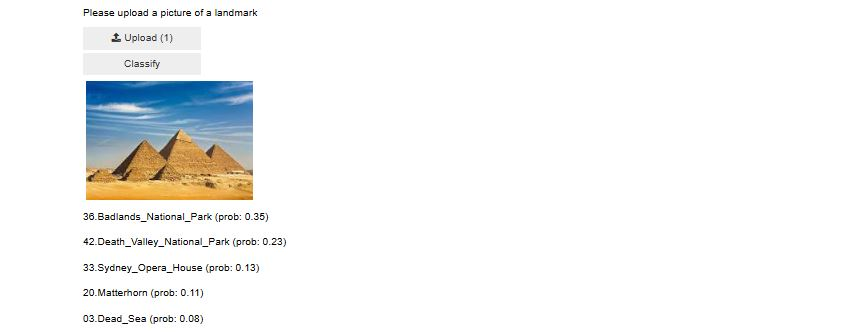

## (Optional) Standalone App or Web App

You can run this notebook as a standalone app on your computer by following these steps:

1. Download this notebook in a directory on your machine
2. Download the model export (for example, ``checkpoints/transfer_exported.pt``) in a subdirectory called ``checkpoints`` within the directory where you save the app.ipynb notebook
3. Install voila if you don't have it already (``pip install voila``)
4. Run your app: ``voila app.ipynb --show_tracebacks=True``
5. Customize your notebook to make your app prettier and rerun voila

You can also deploy this app as a website using Binder: https://voila.readthedocs.io/en/stable/deploy.html#deployment-on-binder

# Create Your Submission Archive

Now that you are done with your project, please run the following cell. It will generate a file containing all the code you have written, as well as the notebooks. Please submit that file to complete your project

In [11]:
!python src/create_submit_pkg.py

executing: jupyter nbconvert --to html cnn_from_scratch.ipynb
[NbConvertApp] Converting notebook cnn_from_scratch.ipynb to html
[NbConvertApp] Writing 987304 bytes to cnn_from_scratch.html
executing: jupyter nbconvert --to html transfer_learning.ipynb
[NbConvertApp] Converting notebook transfer_learning.ipynb to html
[NbConvertApp] Writing 410759 bytes to transfer_learning.html
executing: jupyter nbconvert --to html app.ipynb
[NbConvertApp] Converting notebook app.ipynb to html
[NbConvertApp] Writing 325740 bytes to app.html
Adding files to submission_2025-07-22T08h36m.tar.gz
src/train.py
src/transfer.py
src/data.py
src/predictor.py
src/optimization.py
src/create_submit_pkg.py
src/__init__.py
src/model.py
src/helpers.py
cnn_from_scratch.ipynb
transfer_learning.ipynb
app.ipynb
app.html
cnn_from_scratch.html
transfer_learning.html

----------------------------------------------------------------
Done. Please submit the file submission_2025-07-22T08h36m.tar.gz
----------------------------